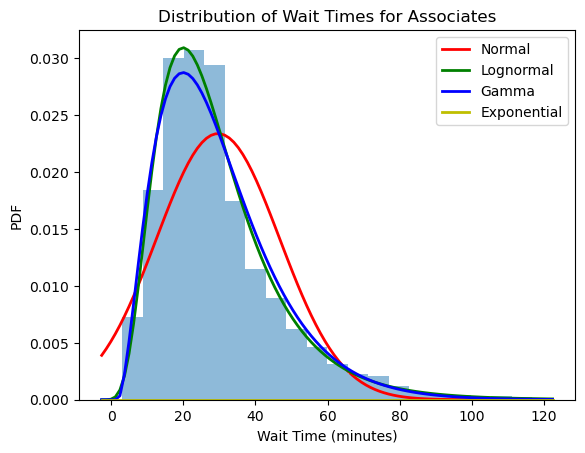

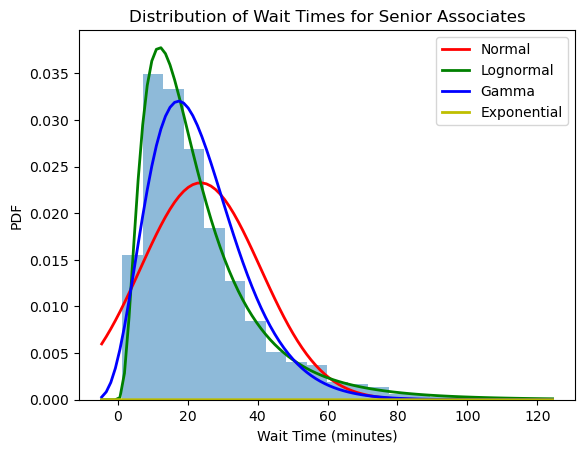

In [2]:
import numpy as np
from scipy.stats import norm, lognorm, gamma, beta, expon, kstest
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, kstest, anderson_ksamp
import pandas as pd


# import data for associates and senior associates 
assoc_data = pd.read_csv('Delwarca_Assoc_Combined.csv')
# fit distributions for associates
assoc_wait_time = assoc_data['x'].values

assoc_norm_mu, assoc_norm_std = norm.fit(assoc_wait_time)
assoc_ln_params = lognorm.fit(assoc_wait_time)
assoc_gamma_shape, assoc_gamma_loc, assoc_gamma_scale = gamma.fit(assoc_wait_time)
assoc_exp_lambda = expon.fit(assoc_wait_time)[1]

# fit distributions for senior associates
#senior_data = exhibit_2[exhibit_2['Employee Type'] == 'Senior Associate']
sr_assoc_data = pd.read_csv('Delwarca_SnrAssoc_Combined.csv')
senior_wait_time = sr_assoc_data['x'].values

senior_norm_mu, senior_norm_std = norm.fit(senior_wait_time)
senior_ln_params = lognorm.fit(senior_wait_time)
senior_gamma_shape, senior_gamma_loc, senior_gamma_scale = gamma.fit(senior_wait_time)
senior_exp_lambda = expon.fit(senior_wait_time)[1]

# plot histograms and PDFs for associates
plt.hist(assoc_wait_time, bins=20, density=True, alpha=0.5)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
assoc_norm_pdf = norm.pdf(x, assoc_norm_mu, assoc_norm_std)
plt.plot(x, assoc_norm_pdf, 'r', linewidth=2, label='Normal')
assoc_ln_pdf = lognorm.pdf(x, assoc_ln_params[0], assoc_ln_params[1], assoc_ln_params[2])
plt.plot(x, assoc_ln_pdf, 'g', linewidth=2, label='Lognormal')
assoc_gamma_pdf = gamma.pdf(x, assoc_gamma_shape, assoc_gamma_loc, assoc_gamma_scale)
plt.plot(x, assoc_gamma_pdf, 'b', linewidth=2, label='Gamma')
assoc_exp_pdf = expon.pdf(x, scale=1/assoc_exp_lambda)
plt.plot(x, assoc_exp_pdf, 'y', linewidth=2, label='Exponential')
plt.legend()
plt.title('Distribution of Wait Times for Associates')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('PDF')
plt.show()

# plot histograms and PDFs for senior associates
plt.hist(senior_wait_time, bins=20, density=True, alpha=0.5)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
senior_norm_pdf = norm.pdf(x, senior_norm_mu, senior_norm_std)
plt.plot(x, senior_norm_pdf, 'r', linewidth=2, label='Normal')
senior_ln_pdf = lognorm.pdf(x, senior_ln_params[0], senior_ln_params[1], senior_ln_params[2])
plt.plot(x, senior_ln_pdf, 'g', linewidth=2, label='Lognormal')
senior_gamma_pdf = gamma.pdf(x, senior_gamma_shape, senior_gamma_loc, senior_gamma_scale)
plt.plot(x, senior_gamma_pdf, 'b', linewidth=2, label='Gamma')
senior_exp_pdf = expon.pdf(x, scale=1/senior_exp_lambda)
plt.plot(x, senior_exp_pdf, 'y', linewidth=2, label='Exponential')
plt.legend()
plt.title('Distribution of Wait Times for Senior Associates')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('PDF')
plt.show()



C:\Users\samit\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\samit\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Results for Associates:
  Distribution  KS Statistic        p-value
0         norm      0.117760   3.604512e-52
1      lognorm      0.027435   3.122795e-03
2        gamma      0.042795   3.004673e-07
3         beta      0.043522   1.754439e-07
4        expon      0.204087  8.748136e-157

Results for Senior Associates:
  Distribution  KS Statistic       p-value
0         norm      0.126106  1.209675e-41
1      lognorm      0.016143  4.166844e-01
2        gamma      0.068421  1.544675e-12
3         beta      0.031890  4.644809e-03
4        expon      0.142481  4.328538e-53


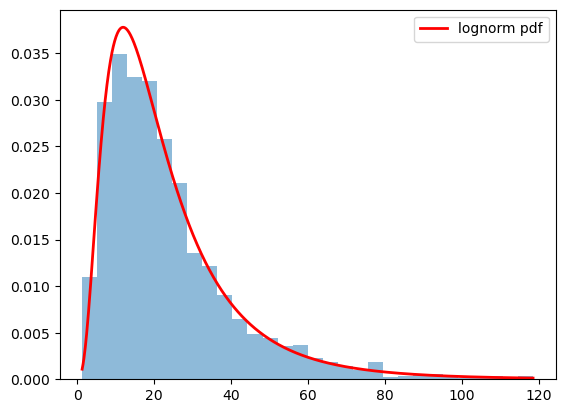

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, gamma, beta, expon, kstest

# Load the data for Associates and Senior Associates
# data_associates = pd.read_csv("data_associates.csv")
# data_senior_associates = pd.read_csv("data_senior_associates.csv")

# Remove any missing values from the datasets
data_associates = assoc_data['x'].values
data_senior_associates = sr_assoc_data['x'].values

# Define the distributions to test
distributions = [norm, lognorm, gamma, beta, expon]

# Create a function to fit each distribution and return the goodness-of-fit test result
def fit_distribution(data, dist):
    # Fit the distribution to the data
    params = dist.fit(data)
    # Calculate the Kolmogorov-Smirnov (KS) test statistic and p-value
    test_stat, p_value = kstest(data, dist.cdf, args=params)
    return (dist.name, test_stat, p_value)

# Loop through each distribution and fit to the Associate data
results_associates = []
for dist in distributions:
    results_associates.append(fit_distribution(data_associates, dist))
    
# Loop through each distribution and fit to the Senior Associate data
results_senior_associates = []
for dist in distributions:
    results_senior_associates.append(fit_distribution(data_senior_associates, dist))
    
# Print the results for each distribution for Associates and Senior Associates
print("Results for Associates:")
print(pd.DataFrame(results_associates, columns=["Distribution", "KS Statistic", "p-value"]))
print("\nResults for Senior Associates:")
print(pd.DataFrame(results_senior_associates, columns=["Distribution", "KS Statistic", "p-value"]))

# Plot the histogram of the Senior Associate data with the best-fitting distribution
best_dist = lognorm
params = best_dist.fit(data_senior_associates)
plt.hist(data_senior_associates, bins=30, density=True, alpha=0.5)
x = np.linspace(min(data_senior_associates), max(data_senior_associates), 1000)
pdf = best_dist.pdf(x, *params)
plt.plot(x, pdf, 'r-', lw=2, label='lognorm pdf')
plt.legend()
plt.show()

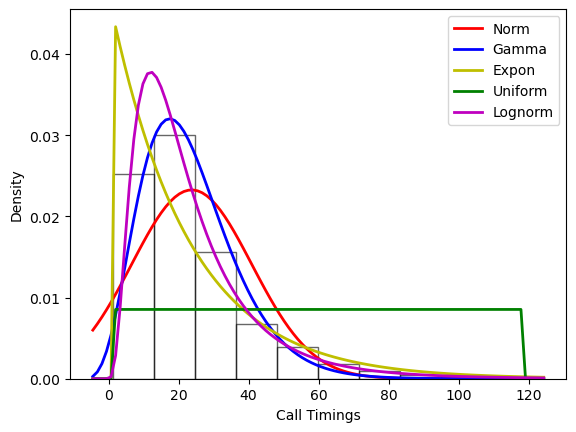

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, expon, uniform, weibull_min, lognorm

# assuming 'data' is your array of call times
data = data_senior_associates  # replace with your data

# plotting histogram
plt.hist(data, bins=10, density=True, alpha=0.6, facecolor='none', edgecolor='black')

# parameters for different distributions
norm_params = norm.fit(data)
gamma_params = gamma.fit(data)
expon_params = expon.fit(data)
uniform_params = uniform.fit(data)
#weibull_params = weibull_min.fit(data)
lognorm_params = lognorm.fit(data)

# create a range for x
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# calculate the pdf for different distributions and plot
plt.plot(x, norm.pdf(x, *norm_params), 'r', linewidth=2)
plt.plot(x, gamma.pdf(x, *gamma_params), 'b', linewidth=2)
plt.plot(x, expon.pdf(x, *expon_params), 'y', linewidth=2)
plt.plot(x, uniform.pdf(x, *uniform_params), 'g', linewidth=2)
#plt.plot(x, weibull_min.pdf(x, *weibull_params), 'c', linewidth=2)
plt.plot(x, lognorm.pdf(x, *lognorm_params), 'm', linewidth=2)
plt.xlabel('Call Timings')
plt.ylabel('Density')
plt.legend(['Norm', 'Gamma', 'Expon', 'Uniform','Lognorm'])
plt.show()

In [23]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 640x480 with 0 Axes>

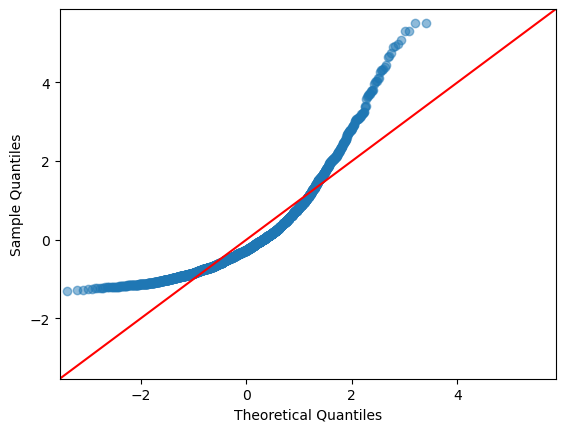

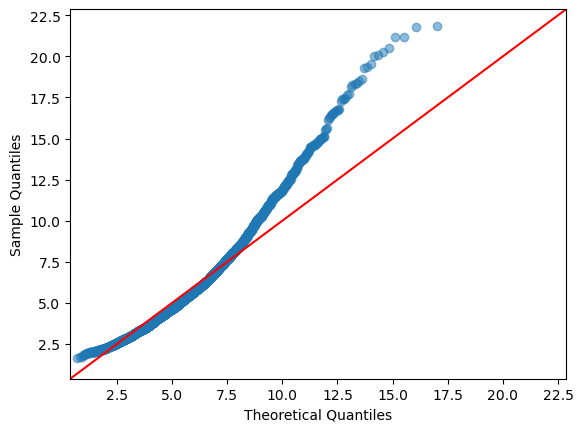

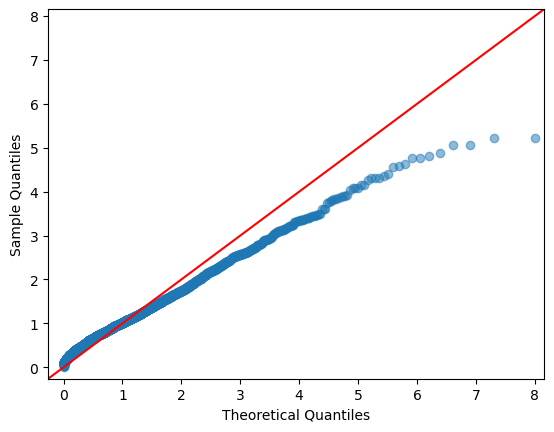

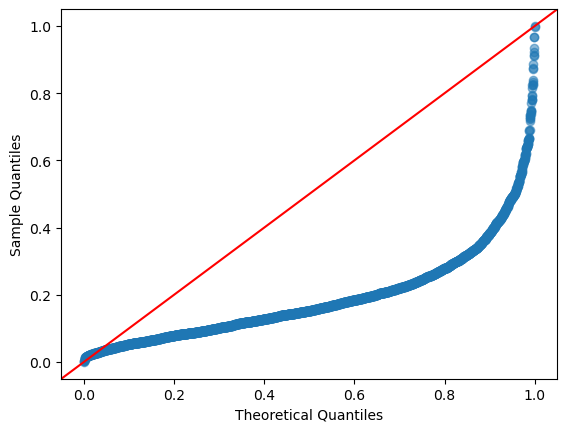

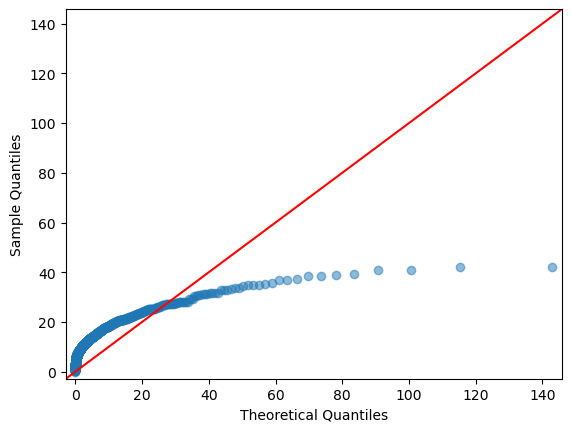

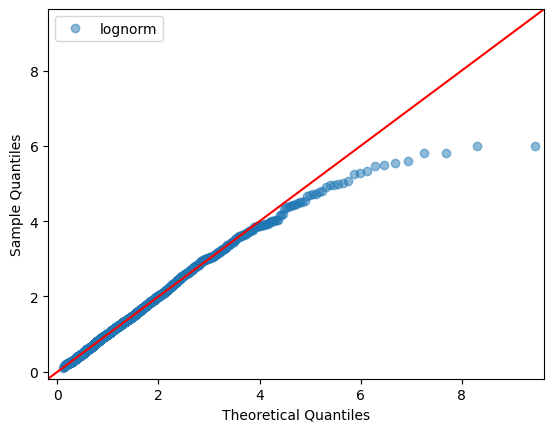

In [25]:
# create a list of fitted distributions and colors
distributions = [norm, gamma, expon, uniform, weibull_min, lognorm]
params = [norm_params, gamma_params, expon_params, uniform_params, weibull_params, lognorm_params]
colors = ['r', 'b', 'y', 'g', 'c', 'm']

plt.figure()

for i, distribution in enumerate(distributions):
    # generate Q-Q plot for each distribution
    qqplot(data, dist=distribution, fit=True, line='45', color=colors[i], alpha=0.5, label=distribution.name)

plt.legend()
plt.show()

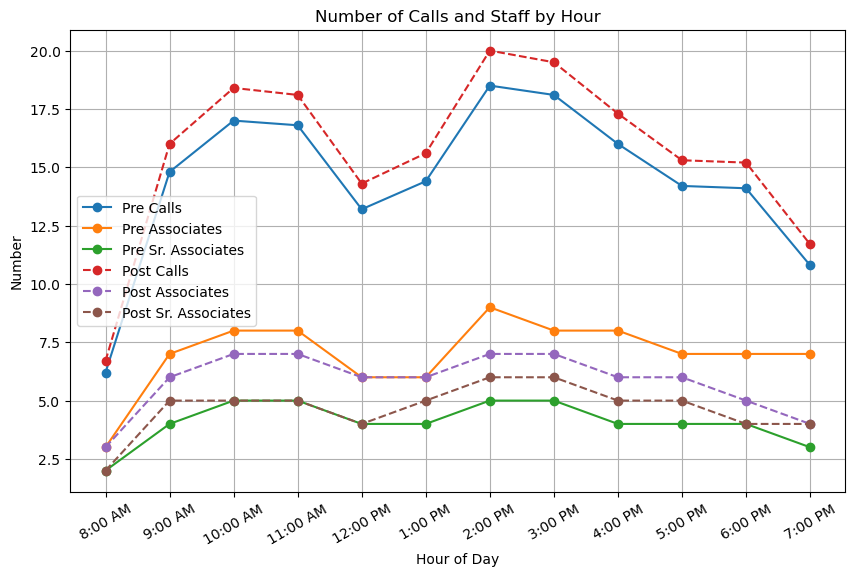

In [2]:
import matplotlib.pyplot as plt

# Hourly data
hours = ['8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM', '12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM', '6:00 PM', '7:00 PM']

# Pre Rapid ID (Exhibit 1)
pre_calls = [6.2, 14.8, 17.0, 16.8, 13.2, 14.4, 18.5, 18.1, 16.0, 14.2, 14.1, 10.8]
pre_associates = [3, 7, 8, 8, 6, 6, 9, 8, 8, 7, 7, 7]
pre_senior_associates = [2, 4, 5, 5, 4, 4, 5, 5, 4, 4, 4, 3]

# Post Rapid ID (Exhibit 4)
post_calls = [6.7, 16.0, 18.4, 18.1, 14.3, 15.6, 20.0, 19.5, 17.3, 15.3, 15.2, 11.7]
post_associates = [3, 6, 7, 7, 6, 6, 7, 7, 6, 6, 5, 4]
post_senior_associates = [2, 5, 5, 5, 4, 5, 6, 6, 5, 5, 4, 4]

plt.figure(figsize=(10,6))

# Pre Rapid ID
plt.plot(hours, pre_calls, marker='o', label='Pre Calls')
plt.plot(hours, pre_associates, marker='o', label='Pre Associates')
plt.plot(hours, pre_senior_associates, marker='o', label='Pre Sr. Associates')

# Post Rapid ID
plt.plot(hours, post_calls, marker='o', linestyle='--', label='Post Calls')
plt.plot(hours, post_associates, marker='o', linestyle='--', label='Post Associates')
plt.plot(hours, post_senior_associates, marker='o', linestyle='--', label='Post Sr. Associates')

plt.xlabel('Hour of Day')
plt.ylabel('Number')
plt.title('Number of Calls and Staff by Hour')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()